In [1]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.datasets import boston_housing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Load the Boston Housing dataset
(X_train, y_train), (X_test, y_test) = boston_housing.load_data()

# Standardize the input features (mean = 0, standard deviation = 1)
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Create the neural network model
model = Sequential()
model.add(Dense(64, activation='relu', input_shape=(X_train.shape[1],)))
model.add(Dense(32, activation='relu'))
model.add(Dense(1))

# Compile the model
model.compile(loss='mean_squared_error', optimizer='adam')

# Train the model
model.fit(X_train, y_train, epochs=100, batch_size=32, verbose=1)

# Evaluate the model on the test set
loss = model.evaluate(X_test, y_test, verbose=0)

# Calculate the accuracy (R-squared) of the model
y_pred = model.predict(X_test).flatten()
accuracy = 1 - loss / np.var(y_test)

print(f"Mean Squared Error: {loss:.2f}")
print(f"Accuracy (R-squared): {accuracy:.2%}")


57026/57026 [==============================] - 0s 0us/step
Epoch 1/100
13/13 [==============================] - 8s 4ms/step - loss: 571.1449
Epoch 2/100
13/13 [==============================] - 0s 3ms/step - loss: 528.5627
Epoch 3/100
13/13 [==============================] - 0s 3ms/step - loss: 479.6616
Epoch 4/100
13/13 [==============================] - 0s 3ms/step - loss: 416.6589
Epoch 5/100
13/13 [==============================] - 0s 3ms/step - loss: 338.7342
Epoch 6/100
13/13 [==============================] - 0s 3ms/step - loss: 252.5829
Epoch 7/100
13/13 [==============================] - 0s 3ms/step - loss: 166.3754
Epoch 8/100
13/13 [==============================] - 0s 3ms/step - loss: 101.3785
Epoch 9/100
13/13 [==============================] - 0s 3ms/step - loss: 66.2201
Epoch 10/100
13/13 [==============================] - 0s 3ms/step - loss: 49.3240
Epoch 11/100
13/13 [==============================] - 0s 3ms/step - loss: 39.7578
Epoch 12/100
13/13 [====================

Epoch 1/100
4/4 [==============================] - 0s 6ms/step
Epoch 2/100
4/4 [==============================] - 0s 8ms/step
Epoch 3/100
4/4 [==============================] - 0s 4ms/step
Epoch 4/100
4/4 [==============================] - 0s 4ms/step
Epoch 5/100
4/4 [==============================] - 0s 5ms/step
Epoch 6/100
4/4 [==============================] - 0s 4ms/step
Epoch 7/100
4/4 [==============================] - 0s 3ms/step
Epoch 8/100
4/4 [==============================] - 0s 6ms/step
Epoch 9/100
4/4 [==============================] - 0s 6ms/step
Epoch 10/100
4/4 [==============================] - 0s 3ms/step
Epoch 11/100
4/4 [==============================] - 0s 7ms/step
Epoch 12/100
4/4 [==============================] - 0s 4ms/step
Epoch 13/100
4/4 [==============================] - 0s 5ms/step
Epoch 14/100
4/4 [==============================] - 0s 3ms/step
Epoch 15/100
4/4 [==============================] - 0s 4ms/step
Epoch 16/100
4/4 [==============================]

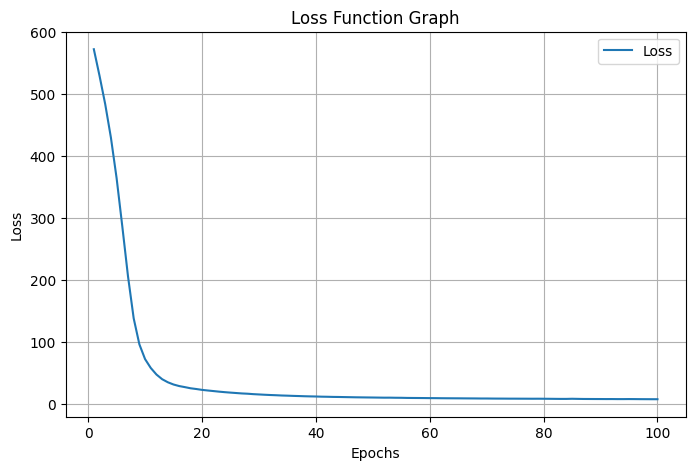

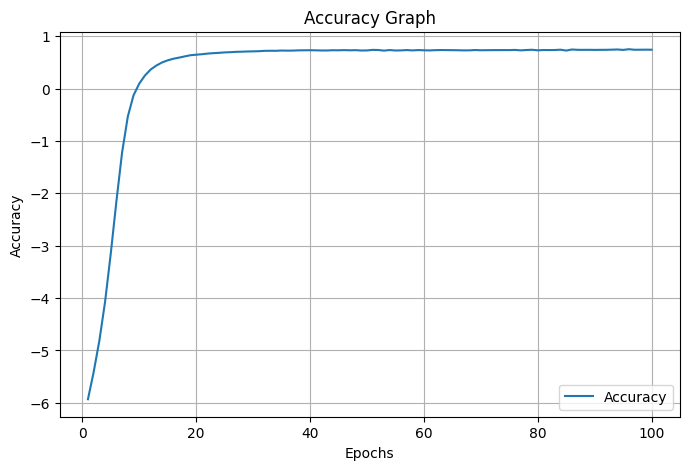

In [2]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.datasets import boston_housing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt

# Load the Boston Housing dataset
(X_train, y_train), (X_test, y_test) = boston_housing.load_data()

# Standardize the input features (mean = 0, standard deviation = 1)
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Create the neural network model
model = Sequential()
model.add(Dense(64, activation='relu', input_shape=(X_train.shape[1],)))
model.add(Dense(32, activation='relu'))
model.add(Dense(1))

# Compile the model
model.compile(loss='mean_squared_error', optimizer='adam')

# Lists to store training history
history = {'loss': [], 'accuracy': []}

# Training the model and recording history
epochs = 100
for epoch in range(epochs):
    print(f"Epoch {epoch+1}/{epochs}")
    history_epoch = model.fit(X_train, y_train, epochs=1, batch_size=32, verbose=0)
    loss = history_epoch.history['loss'][0]
    history['loss'].append(loss)

    # Evaluate the model on the test set for calculating accuracy
    y_pred = model.predict(X_test).flatten()
    accuracy = 1 - np.mean((y_pred - y_test) ** 2) / np.var(y_test)
    history['accuracy'].append(accuracy)

# Plotting the loss function graph
plt.figure(figsize=(8, 5))
plt.plot(range(1, epochs+1), history['loss'], label='Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Loss Function Graph')
plt.legend()
plt.grid(True)
plt.show()

# Plotting the accuracy graph
plt.figure(figsize=(8, 5))
plt.plot(range(1, epochs+1), history['accuracy'], label='Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title('Accuracy Graph')
plt.legend()
plt.grid(True)
plt.show()


In [3]:
import numpy as np
from keras.datasets import boston_housing
from keras.models import Sequential
from keras.layers import Dense

# Load the Boston Housing dataset
(train_data, train_targets), (test_data, test_targets) = boston_housing.load_data()

# Normalize the data
mean = train_data.mean(axis=0)
std = train_data.std(axis=0)
train_data = (train_data - mean) / std
test_data = (test_data - mean) / std

# Define the model architecture
model = Sequential()
model.add(Dense(64, activation='relu', input_shape=(train_data.shape[1],)))
model.add(Dense(64, activation='relu'))
model.add(Dense(1))

# Compile the model
model.compile(optimizer='rmsprop', loss='mse', metrics=['mae'])

# Train the model
model.fit(train_data, train_targets, epochs=100, batch_size=16, verbose=0)

# Evaluate the model
test_loss, test_mae = model.evaluate(test_data, test_targets)

print('Test Mean Absolute Error:', test_mae)

# Make predictions
predictions = model.predict(test_data)

# Display top 5 target values and predicted values
top_5_targets = np.sort(test_targets)[-5:]
top_5_predictions = np.squeeze(predictions[np.argsort(test_targets)])[-5:]

print("Top 5 Target Values:\n", top_5_targets)
print("Top 5 Predicted Values:\n", top_5_predictions)

4/4 [==============================] - 0s 5ms/step - loss: 17.1491 - mae: 2.6888
Test Mean Absolute Error: 2.688800096511841
4/4 [==============================] - 0s 4ms/step
Top 5 Target Values:
 [43.1 46.7 50.  50.  50. ]
Top 5 Predicted Values:
 [36.23081  40.67502  40.29016  46.470245 45.69273 ]
